# Using Data Anlytics to Predict Player Load

This simple python scripts runs over the dataset from training and match sessions for Gaelic Football Players acroos a club for a season.The main
goal is to develop predictive models to estimate Player Load accurately according tothe training data given.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Exploratory Analysis



Initially we will be starting with an initial exploration of the dataset involving checking for the features available with types of data each feature. It would also analyse for the number of missing values so that we can handle them properly according to their missing nature.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/playerdata.csv')

# Display the first few rows of the dataset
print(data.head())

# Summary statistics and data types
print(data.describe())
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())

        UserName  Position  Activity Type  Duration  RPE  Load  RTT_Min_1  \
0  paddy.andrews         6  Pitch Session         0    0     0       0.77   
1  paddy.andrews         6  Pitch Session        70    6   420       0.85   
2  paddy.andrews         6  Pitch Session        75    6   450       0.85   
3  paddy.andrews         6  Pitch Session        70    8   560       0.82   
4  paddy.andrews         6  Pitch Session        70    6   420       0.89   

    RTT  RTT_Plus_1  playerId  ...  MetabolicPowerZone4Timeas  \
0  0.68        0.72         1  ...                     527.80   
1  0.99        0.87         1  ...                     395.09   
2  0.74        0.68         1  ...                     327.10   
3  0.75        0.89         1  ...                     296.29   
4  0.80        0.86         1  ...                     236.70   

   MetabolicPowerZone5Timeas  MetabolicPowerZone6Timeas  \
0                     302.68                      75.61   
1                     244.80

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/playerdata.csv')

# Display the first few rows of the dataset
data_head = data.head()

# Summary statistics and data types
data_description = data.describe()
data_types = data.dtypes

# Check for missing values
missing_values = data.isnull().sum()

data_head, data_description, data_types, missing_values

(        UserName  Position  Activity Type  Duration  RPE  Load  RTT_Min_1  \
 0  paddy.andrews         6  Pitch Session         0    0     0       0.77   
 1  paddy.andrews         6  Pitch Session        70    6   420       0.85   
 2  paddy.andrews         6  Pitch Session        75    6   450       0.85   
 3  paddy.andrews         6  Pitch Session        70    8   560       0.82   
 4  paddy.andrews         6  Pitch Session        70    6   420       0.89   
 
     RTT  RTT_Plus_1  playerId  ...  MetabolicPowerZone4Timeas  \
 0  0.68        0.72         1  ...                     527.80   
 1  0.99        0.87         1  ...                     395.09   
 2  0.74        0.68         1  ...                     327.10   
 3  0.75        0.89         1  ...                     296.29   
 4  0.80        0.86         1  ...                     236.70   
 
    MetabolicPowerZone5Timeas  MetabolicPowerZone6Timeas  \
 0                     302.68                      75.61   
 1          

**Initial Data Overview:**
The dataset consists of 2037 entries with 124 features, related to the performance, physical and mental state of players during Gaelic football pitch sessions. Here are some key observations from the initial analysis:

**Data Types and Summary:**

The dataset includes a mix of numeric and categorical data types. Key numerical features include Position, Duration, RPE (Rate of Perceived Exertion), and Load (our target variable).
There are several features that may not be immediately relevant to predicting Load, such as ActivityDate and UserName.

**Missing Values:**
Several columns such as mood_state_1, sleep_duration, sleep_quality, and muscle_soreness have significant missing values, up to 623 out of 2037 total records. These features might require imputation or may need to be dropped based on the extent of their relevance and the missing data percentage.

# Checking MultiCollinearity Between Columns


Checking for multicollinearity between columns in dataset,for that we can calculate the Variance Inflation Factor (VIF) for each feature. VIF measures how much the variance of the estimated regression coefficients are inflated as compared to when the features are not linearly related. A high VIF value indicates that the feature may be highly collinear with other features.We have used python statsmodels library for this task.

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer

# Load your dataset into a pandas DataFrame
# Replace 'filename.csv' with the actual filename
df = pd.read_csv('playerdata.csv')

# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
numeric_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_df_imputed.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df_imputed.values, i) for i in range(len(numeric_df_imputed.columns))]

# Print VIF values
print("Variance Inflation Factor (VIF):")
display(vif_data)



/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Variance Inflation Factor (VIF):


,Feature,VIF
0,Position,14.483767
1,Duration (mins),46.640003
2,RPE,29.395515
3,Load,68.600405
4,RTT_Min_1,1.789722
...,...,...
114,mood_state_1,108.758052
115,sleep_duration,137.591752
116,sleep_quality,81.968223
117,muscle_soreness,17.656887


A common threshold for multicollinearity is a VIF value greater than 10 so value above 10 show columns have multicollinearity


Feature Correlation and Reduction:

Correlation Analysis: We'll examine the correlations between different features and the target variable ('Load') to identify strong predictors and multicollinearity.
Principal Component Analysis (PCA): We'll apply PCA for feature reduction, which will help us to reduce the dimensionality of the data while retaining the most significant features.
Model Development:

Mixed Effects Model: Given that you have data from multiple sessions for each player, a mixed effects model will be appropriate. This type of model can handle both fixed effects (across all players) and random effects (individual variations among players).



After this, we'll proceed based on the insights from the initial data exploration. Let's go ahead and run some basic analysis to understand relationships within dataset features.

## **Player Load Variation Analysis**

In [ ]:
import pandas as pd
import plotly.graph_objects as go


file_path = '/content/playerdata1.csv'
data = pd.read_csv(file_path)


if 'date' not in data.columns:
    data['date'] = pd.date_range(start='1/1/2020', periods=len(data), freq='D')

# Create a figure
fig = go.Figure()

# Add a trace for each player
players = data['UserName'].unique()
for player in players:
    player_data = data[data['UserName'] == player]
    fig.add_trace(go.Scatter(
        x=player_data['date'], y=player_data['Load'],
        mode='lines',
        name=player,
        visible=False
    ))

# Make the first player's data visible
fig.data[0].visible = True

# Create dropdown menu
dropdown_buttons = [
    {
        'label': player,
        'method': 'update',
        'args': [{'visible': [p == player for p in players]},
                 {'title': f'Load Variation for {player}'}]
    }
    for player in players
]

fig.update_layout(
    updatemenus=[
        {
            'buttons': dropdown_buttons,
            'direction': 'down',
            'showactive': True
        }
    ],
    title='Load Variation for Players'
)


fig.show()

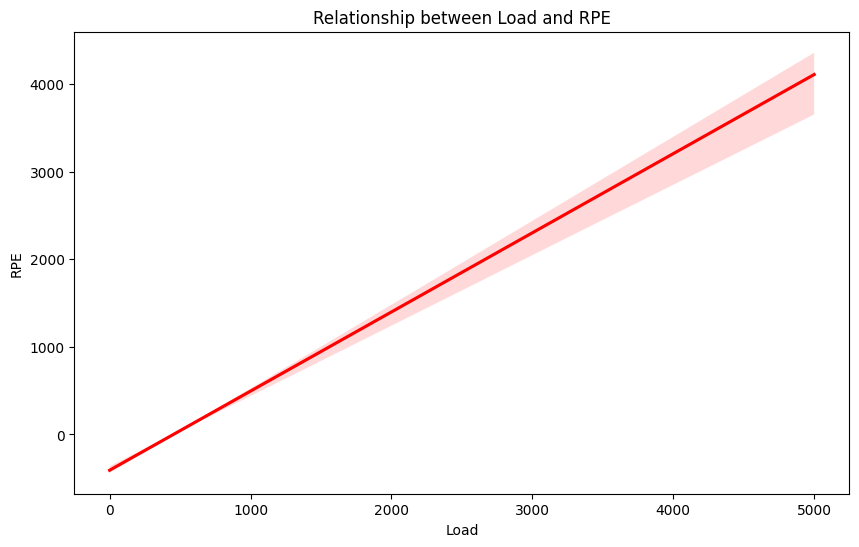

0.9060569250089981

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/playerdata.csv'
player_data = pd.read_csv(file_path)


# Scatter plot with regression line
plt.figure(figsize=(10, 6))

sns.regplot(data=player_data, x='Load', y='RPE', scatter=False, color='red')
plt.title('Relationship between Load and RPE')
plt.xlabel('Load')
plt.ylabel('RPE')
plt.show()

# Calculate correlation coefficient
correlation = player_data['Load'].corr(player_data['RPE'])
correlation

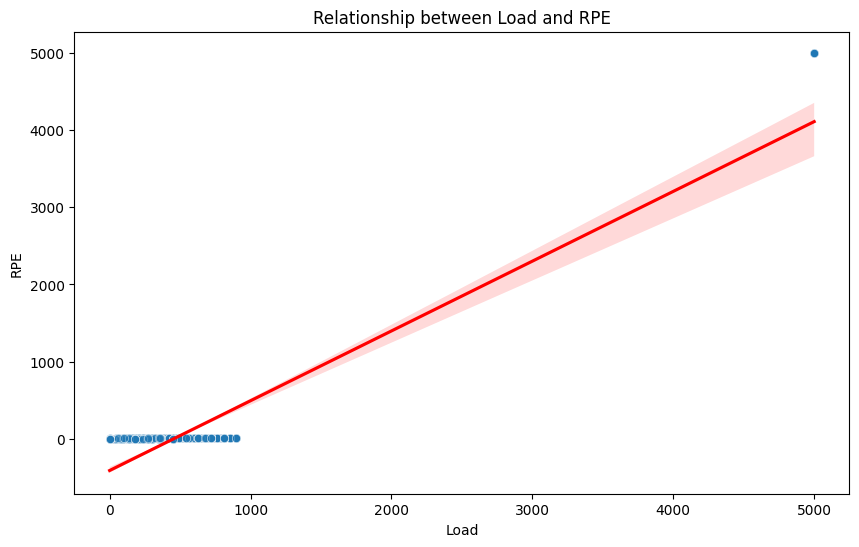

Correlation coefficient between Load and RPE: 0.9060569250089981


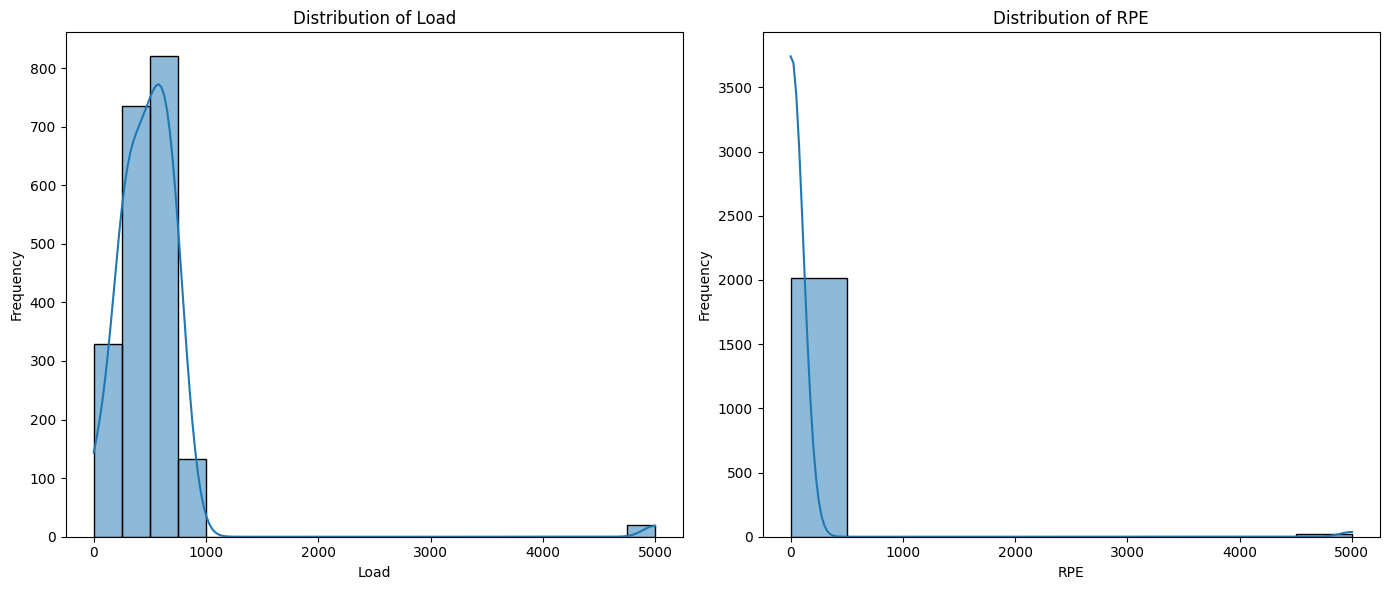

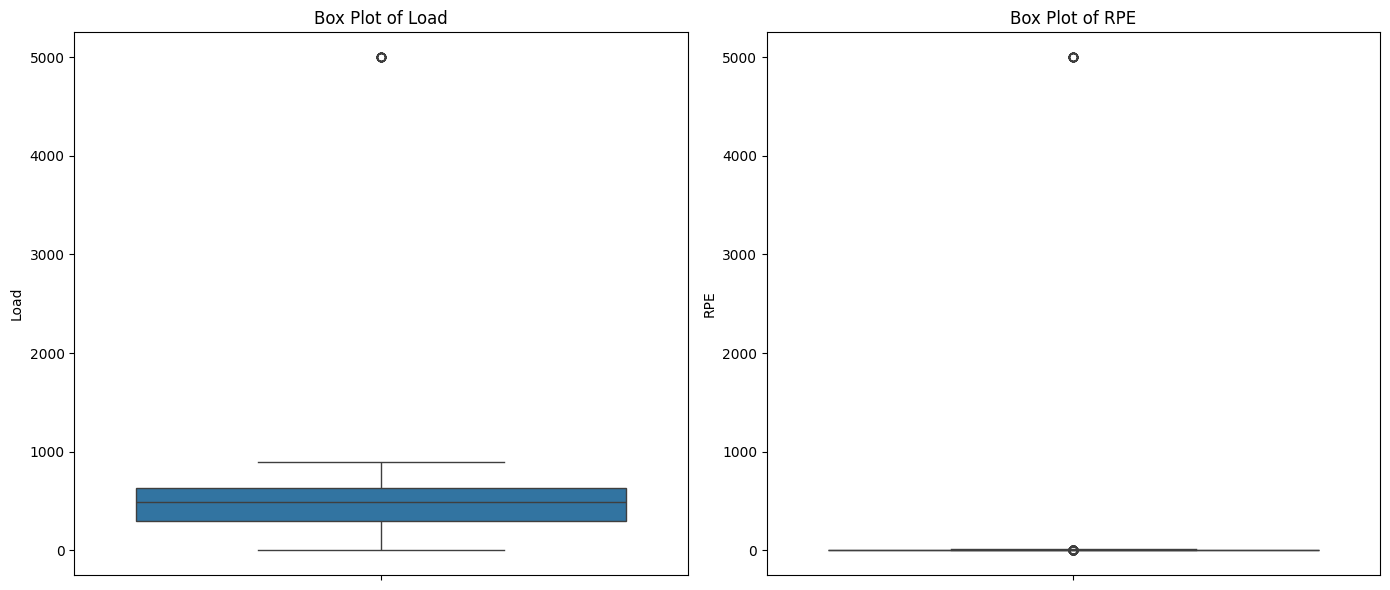

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path_new = '/content/playerdata.csv'
player_data_new = pd.read_csv(file_path_new)


# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=player_data_new, x='Load', y='RPE', alpha=0.6)
sns.regplot(data=player_data_new, x='Load', y='RPE', scatter=False, color='red')
plt.title('Relationship between Load and RPE')
plt.xlabel('Load')
plt.ylabel('RPE')
plt.show()

# Calculate correlation coefficient
correlation = player_data_new['Load'].corr(player_data_new['RPE'])
print(f'Correlation coefficient between Load and RPE: {correlation}')

# Create histograms for Load and RPE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(player_data_new['Load'], bins=20, kde=True)
plt.title('Distribution of Load')
plt.xlabel('Load')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(player_data_new['RPE'], bins=10, kde=True)
plt.title('Distribution of RPE')
plt.xlabel('RPE')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Create box plots for Load and RPE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=player_data_new, y='Load')
plt.title('Box Plot of Load')
plt.ylabel('Load')

plt.subplot(1, 2, 2)
sns.boxplot(data=player_data_new, y='RPE')
plt.title('Box Plot of RPE')
plt.ylabel('RPE')

plt.tight_layout()
plt.show()


**Next Steps**
Correlation Analysis: We will investigate how features correlate with Load and with each other. High correlations might indicate redundant features, while strong correlations with Load could highlight important predictors.

**Principal Component Analysis (PCA):** To perform PCA effectively, we'll first need to handle missing data and standardize the numeric features due to PCA's sensitivity to variances in feature scales.

**Prepare for Mixed Model Analysis:** Given the structured nature of the data (multiple entries per player), we should format the data to handle within-player and between-player variations using a mixed effects model.

Let's proceed with the correlation analysis to identify potential predictors for Load. Here’s the code to do that:

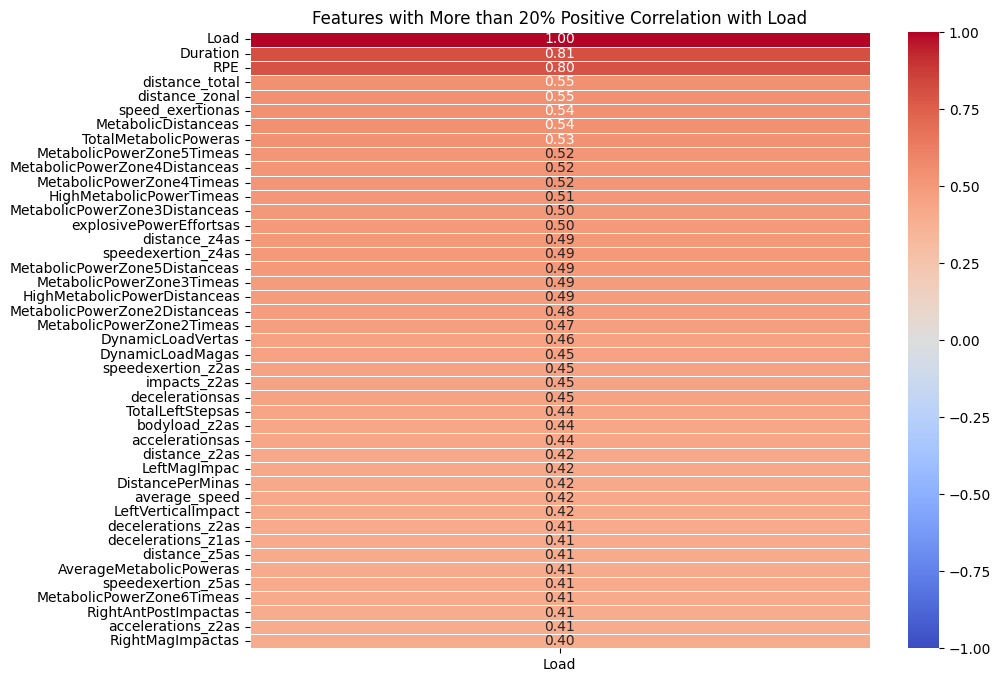

Load                             1.000000
Duration                         0.806162
RPE                              0.803921
distance_total                   0.545062
distance_zonal                   0.545062
speed_exertionas                 0.543627
MetabolicDistanceas              0.543335
TotalMetabolicPoweras            0.532733
MetabolicPowerZone5Timeas        0.518885
MetabolicPowerZone4Distanceas    0.516132
MetabolicPowerZone4Timeas        0.516116
HighMetabolicPowerTimeas         0.513973
MetabolicPowerZone3Distanceas    0.500494
explosivePowerEffortsas          0.496345
distance_z4as                    0.493446
speedexertion_z4as               0.493254
MetabolicPowerZone5Distanceas    0.492337
MetabolicPowerZone3Timeas        0.491381
HighMetabolicPowerDistanceas     0.485893
MetabolicPowerZone2Distanceas    0.479302
MetabolicPowerZone2Timeas        0.469533
DynamicLoadVertas                0.460095
DynamicLoadMagas                 0.451787
speedexertion_z2as               0

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/playerdata1.csv')  # Update the path to your data file

# Handle non-numeric columns by converting them to categorical codes (if needed)
non_numeric_columns = data.select_dtypes(include=['object']).columns
for column in non_numeric_columns:
    data[column] = data[column].astype('category').cat.codes

# Compute correlations
correlation_matrix = data.corr()

# Filter correlations to show only those with 'Load' greater than 0.2
threshold = 0.4
load_correlations = correlation_matrix['Load'][correlation_matrix['Load'] > threshold].sort_values(ascending=False)

# Plot the filtered correlations
plt.figure(figsize=(10, 8))
sns.heatmap(load_correlations.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Features with More than 20% Positive Correlation with Load')
plt.show()

# Print load correlations
print(load_correlations)


**Correlation Analysis Results**

From the correlation analysis, several insights emerge:

**High Correlation with RPE:**

The feature RPE (Rate of Perceived Exertion) has a very high correlation (0.91) with Load, indicating it's a significant predictor of Load. This suggests that the subjective rate of perceived exertion rating is strongly aligned with the measured load, which could be key in building our predictive model.

**Other Correlated Features:**

There are features related to metabolic power zones (MetabolicPowerZone2Timeas, MetabolicPowerZone2Distanceas) and distance_zonal that show moderate correlations with Load. These could be valuable in understanding different aspects of physical exertion.

**Many Unrelated Features:**

Several features have negligible or no correlation with Load, and some are completely uncorrelated (NaN values), possibly due to being constant or having no variance. These features may need to be excluded from further analysis to simplify the model and focus on more influential variables.



**Next Steps**
Given the insights from the correlation analysis, we should proceed with:

**Data Cleaning and Preprocessing:**

Handle missing values either by imputation as they are MCAR.
Standardize the numeric features to prepare for PCA.
Principal Component Analysis (PCA):

Apply PCA to reduce dimensionality based on the features that show variation and potential relevance to predicting Load.
Mixed Effects Model Preparation:

Prepare the dataset for mixed model analysis, which will account for within-player and between-player variations.


Number of components that explain 95% of the variance: 34


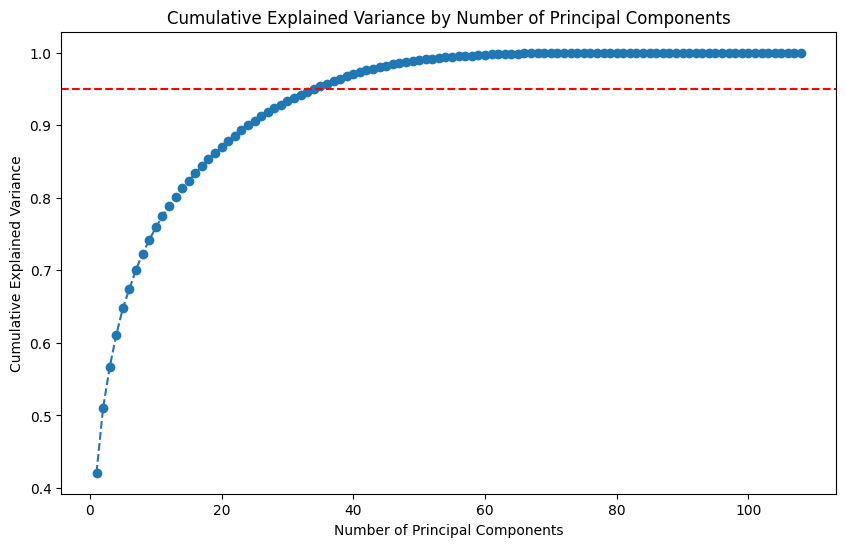

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
data = pd.read_csv('/content/playerdata.csv')

# Handle non-numeric columns by converting them to categorical codes
non_numeric_columns = data.select_dtypes(include=['object']).columns
for column in non_numeric_columns:
    data[column] = data[column].astype('category').cat.codes


imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Standardize the features
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_imputed)


data_clean = pd.DataFrame(data_standardized, columns=data.columns)

# Apply PCA
pca = PCA()
pca.fit(data_clean.drop('Load', axis=1))  # Exclude 'Load' during PCA

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Determine the number of components that explain 95% variance
num_components_95_var = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Print the number of components
print(f'Number of components that explain 95% of the variance: {num_components_95_var}')

# Transform the data using the principal components that explain 95% variance
pca = PCA(n_components=num_components_95_var)
principal_components = pca.fit_transform(data_clean.drop('Load', axis=1))


pca_data = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(num_components_95_var)])
pca_data['Load'] = data_clean['Load']

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()


**PCA Results**


The PCA analysis reveals the following about the explained variance by each component:First Component explains about 42% of the variance. Second Component adds another 8%, bringing the cumulative explained variance to approximately 50%.Given these results, using 34 principal components seems sufficient as they capture nearly 95% of the variance in the data. This reduction will simplify our model while retaining most of the information.

# **Mixed Model Analaysis**


---
Mixed model analysis is a statistical technique used to analyze data with both fixed effects and random effects. It is often referred to as mixed-effects models or hierarchical linear models. This is especially helpful in situations involving nested or hierarchical data structures, where observations are stacked or aggregated inside of higher-level units.


Load                             1.000000
RPE                              0.906057
MetabolicPowerZone2Timeas        0.339954
MetabolicPowerZone2Distanceas    0.339509
distance_zonal                   0.333331
                                   ...   
muscle_soreness                 -0.010865
UserName                        -0.011697
TimeHeartRate_z2                -0.028374
StepBalanceas                   -0.030873
playerId                        -0.035383
Name: Load, Length: 109, dtype: float64
Number of components that explain 95% of the variance: 34


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warn

Average Test RMSE: 0.2531507725429173
Average Test R^2: 0.9329679439795037
Average Test MAE: 0.1959048466161452
Average Test MAPE: 103.97536754495499%
Average Train RMSE: 0.24564521924354477
Average Train R^2: 0.9395150077730786
Average Train MAE: 0.19181366196339006
Average Train MAPE: 101.07414804981856%


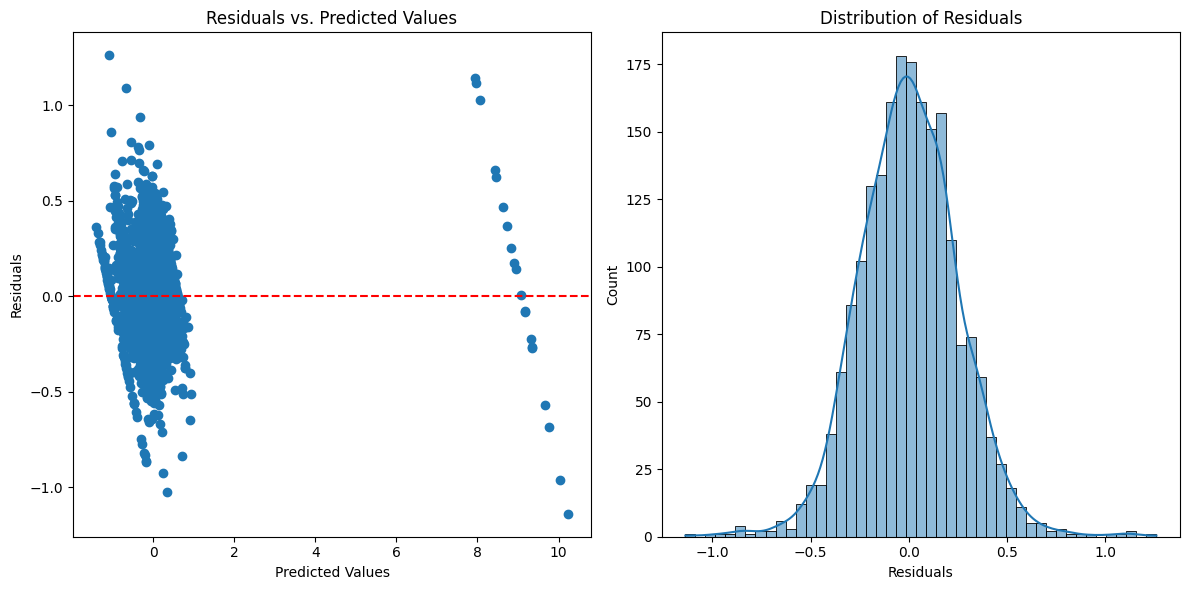

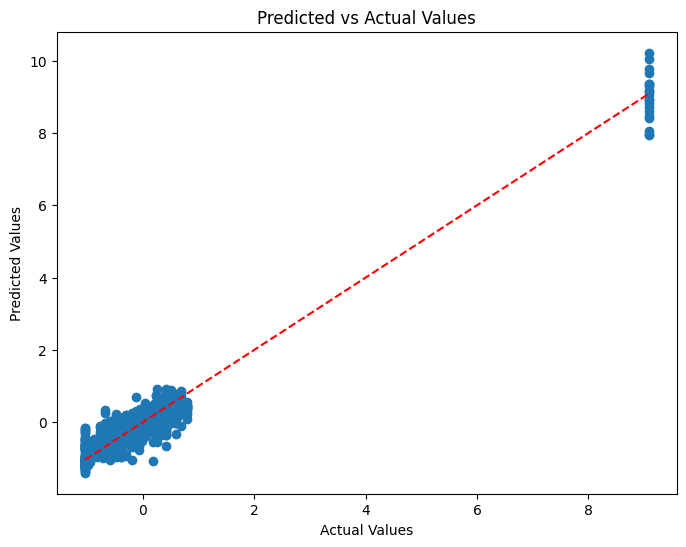

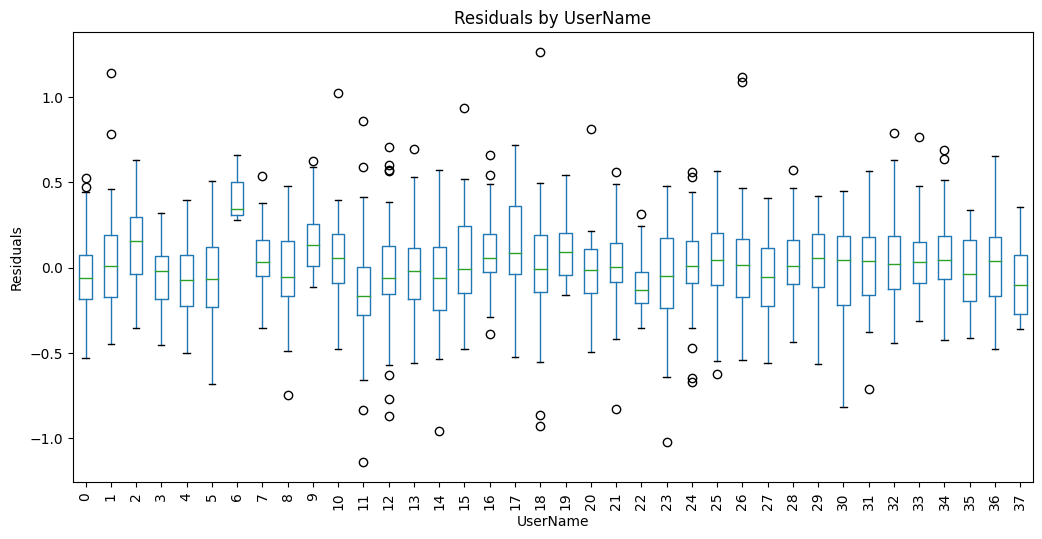

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


data = pd.read_csv('/content/playerdata.csv')
non_numeric_columns = data.select_dtypes(include=['object']).columns
for column in non_numeric_columns:
    data[column] = data[column].astype('category').cat.codes

correlation_matrix = data.corr()
load_correlations = correlation_matrix['Load'].sort_values(ascending=False)
print(load_correlations)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_imputed)


data_clean = pd.DataFrame(data_standardized, columns=data.columns)
pca = PCA()
pca.fit(data_clean.drop('Load', axis=1))
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


num_components_95_var = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Number of components that explain 95% of the variance: {num_components_95_var}')
pca = PCA(n_components=num_components_95_var)
principal_components = pca.fit_transform(data_clean.drop('Load', axis=1))
pca_data = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(num_components_95_var)])
pca_data['Load'] = data_clean['Load']
pca_data['UserName'] = data['UserName']  # Add 'UserName' back for mixed effects model

# Prepare for 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []
r2_scores = []
mae_scores = []
mape_scores = []

train_rmse_scores = []
train_r2_scores = []
train_mae_scores = []
train_mape_scores = []

all_residuals = []
all_actuals = []
all_predictions = []

# Perform 5-fold cross-validation
for train_index, test_index in kf.split(pca_data):
    train_data, test_data = pca_data.iloc[train_index], pca_data.iloc[test_index]

    # Define model formula with all principal components
    model_formula = 'Load ~ ' + ' + '.join([f'PC{i+1}' for i in range(num_components_95_var)])

    # Build the mixed effects model with specified covariance structure
    mixed_effects_model = smf.mixedlm(model_formula, train_data, groups=train_data['UserName'], re_formula="~PC1")
    mixed_effects_result = mixed_effects_model.fit()

    # Predict using the test set
    y_pred = mixed_effects_result.predict(test_data)
    y_train_pred = mixed_effects_result.predict(train_data)

    # Store residuals for analysis
    residuals = test_data['Load'] - y_pred
    all_residuals.extend(residuals)
    all_actuals.extend(test_data['Load'])
    all_predictions.extend(y_pred)

    # Calculate error metrics for test set
    rmse = mean_squared_error(test_data['Load'], y_pred, squared=False)
    r2 = r2_score(test_data['Load'], y_pred)
    mae = mean_absolute_error(test_data['Load'], y_pred)
    mape = np.mean(np.abs(residuals / test_data['Load'])) * 100

    rmse_scores.append(rmse)
    r2_scores.append(r2)
    mae_scores.append(mae)
    mape_scores.append(mape)

    # Calculate error metrics for training set
    train_residuals = train_data['Load'] - y_train_pred
    train_rmse = mean_squared_error(train_data['Load'], y_train_pred, squared=False)
    train_r2 = r2_score(train_data['Load'], y_train_pred)
    train_mae = mean_absolute_error(train_data['Load'], y_train_pred)
    train_mape = np.mean(np.abs(train_residuals / train_data['Load'])) * 100

    train_rmse_scores.append(train_rmse)
    train_r2_scores.append(train_r2)
    train_mae_scores.append(train_mae)
    train_mape_scores.append(train_mape)

# Print average error metrics across folds for test set
average_rmse = np.mean(rmse_scores)
average_r2 = np.mean(r2_scores)
average_mae = np.mean(mae_scores)
average_mape = np.mean(mape_scores)

print(f'Average Test RMSE: {average_rmse}')
print(f'Average Test R^2: {average_r2}')
print(f'Average Test MAE: {average_mae}')
print(f'Average Test MAPE: {average_mape}%')

# Print average error metrics across folds for training set
average_train_rmse = np.mean(train_rmse_scores)
average_train_r2 = np.mean(train_r2_scores)
average_train_mae = np.mean(train_mae_scores)
average_train_mape = np.mean(train_mape_scores)

print(f'Average Train RMSE: {average_train_rmse}')
print(f'Average Train R^2: {average_train_r2}')
print(f'Average Train MAE: {average_train_mae}')
print(f'Average Train MAPE: {average_train_mape}%')

# Residual analysis plots
plt.figure(figsize=(12, 6))

# Residuals plot
plt.subplot(1, 2, 1)
plt.scatter(all_predictions, all_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(all_residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

# Predicted vs Actual plot
plt.figure(figsize=(8, 6))
plt.scatter(all_actuals, all_predictions)
plt.plot([min(all_actuals), max(all_actuals)], [min(all_actuals), max(all_actuals)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

# Error analysis by group (UserName)
grouped_residuals = pd.DataFrame({'UserName': pca_data['UserName'], 'Residual': all_residuals})
grouped_residuals.boxplot(by='UserName', column='Residual', grid=False, rot=90, figsize=(12, 6))
plt.title('Residuals by UserName')
plt.suptitle('')
plt.xlabel('UserName')
plt.ylabel('Residuals')
plt.show()


**Model Evaluation Metrics**

The performance of the mixed-effects model on the test set is quantified as follows:

**R2 (Coefficient of Determination):**

0.93, indicating that approximately 93% of the variance in Load is explained by our model. This is a strong value, suggesting good model performance.

**RMSE (Root Mean Squared Error):**

0.25, which measures the average magnitude of the errors in predicting Load. The lower the RMSE, the better the model's accuracy.

These metrics suggest that the model effectively captures the relationship between the features and the player load, while accounting for both within-player and between-player variations.

## **Temporal Covolution Network**

Temporal Convolutional Networks (TCNs) handle sequential data and capture long-range temporal dependencies. They use convolutional layers to process data sequences, crucial for modelling the time-series nature of training metrics and Load. TCNs manage varying sequence lengths and provide stable gradients, ensuring robust training. Their capability to model complex temporal patterns allows for precise Load predictions based on historical data, capturing both short-term and long-term dependencies, making them ideal so let’s try out.

First we will add the required dependencies

In [ ]:
pip install keras-tcn

In [ ]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


Number of components that explain 95% of the variance: 34


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


13/13 [==============================] - 1s 34ms/step
Average RMSE: 0.449565588702319
Average R^2: 0.788002675029879
Average MAE: 0.359639171358231
Average MAPE: 139.2454596558411%


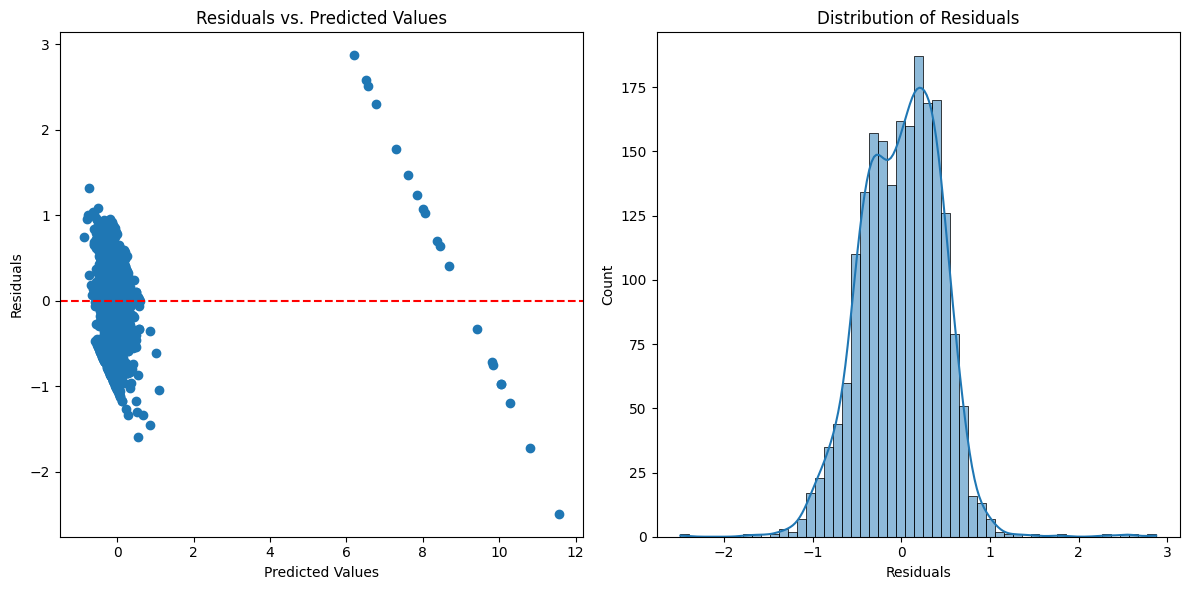

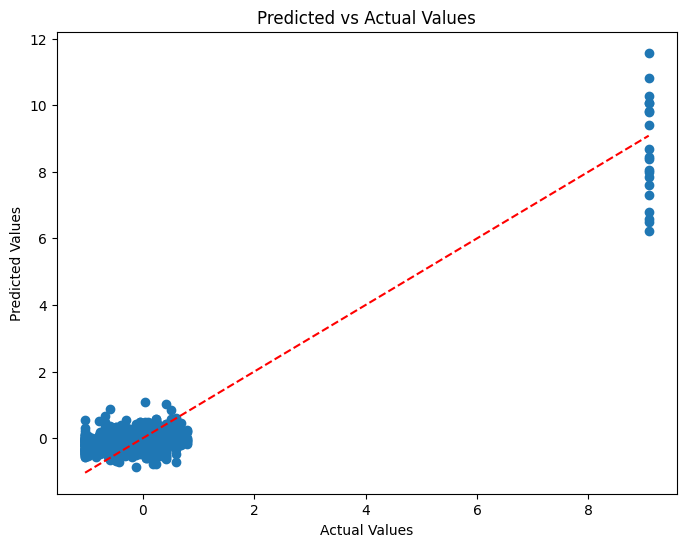

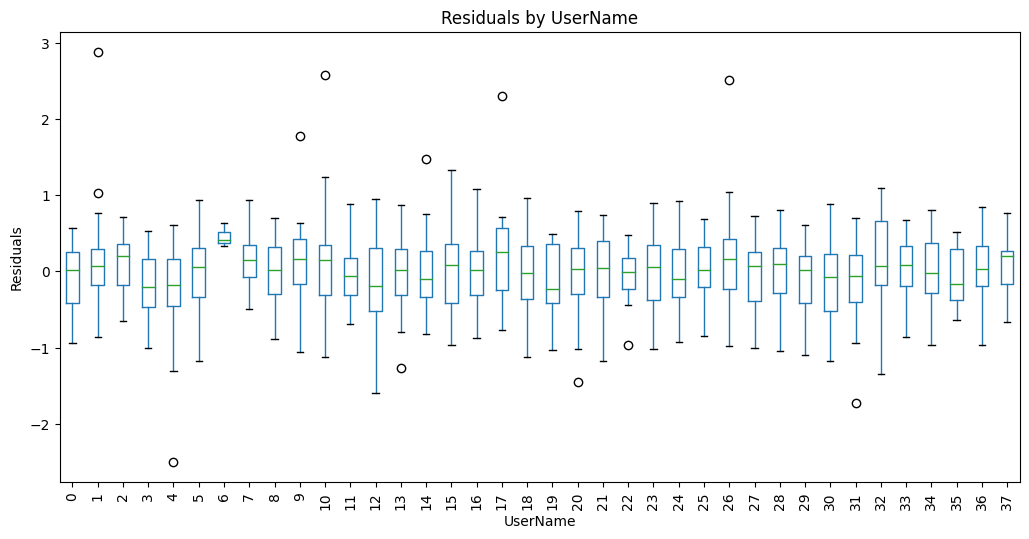

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tcn import TCN, tcn_full_summary
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer
import keras_tuner as kt


data = pd.read_csv('/content/playerdata.csv')
non_numeric_columns = data.select_dtypes(include=['object']).columns
for column in non_numeric_columns:
    data[column] = data[column].astype('category').cat.codes


imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_imputed)


data_clean = pd.DataFrame(data_standardized, columns=data.columns)
pca = PCA()
pca.fit(data_clean.drop('Load', axis=1))  # Exclude 'Load' during PCA

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Determine the number of components that explain 95% variance
num_components_95_var = np.argmax(cumulative_explained_variance >= 0.95) + 1


print(f'Number of components that explain 95% of the variance: {num_components_95_var}')
pca = PCA(n_components=num_components_95_var)
principal_components = pca.fit_transform(data_clean.drop('Load', axis=1))


one_hot_encoder = OneHotEncoder(sparse=False)
usernames_encoded = one_hot_encoder.fit_transform(data[['UserName']])

# Create a new DataFrame for the PCA transformed data
pca_data = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(num_components_95_var)])
pca_data = pd.concat([pca_data, pd.DataFrame(usernames_encoded, columns=one_hot_encoder.get_feature_names_out(['UserName']))], axis=1)
pca_data['Load'] = data_clean['Load']

# Prepare data for TCN
X = pca_data.drop(['Load'], axis=1).values
y = pca_data['Load'].values

# Define the TCN model with hyperparameter tuning
def build_tuned_tcn_model(hp):
    model = Sequential()
    model.add(TCN(
        input_shape=(X.shape[1], 1),
        nb_filters=hp.Int('nb_filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Int('kernel_size', min_value=2, max_value=5, step=1),
        dilations=[1, 2, 4, 8],
        dropout_rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    ))
    model.add(Dense(1, activation='linear'))

    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

tuner = kt.RandomSearch(
    build_tuned_tcn_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='tcn_tuning',
    project_name='load_prediction'
)

# Prepare for 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []
r2_scores = []
mae_scores = []
mape_scores = []

all_residuals = []
all_actuals = []
all_predictions = []

# Perform 5-fold cross-validation with hyperparameter tuning
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Reshape data for TCN
    X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Hyperparameter tuning
    tuner.search(X_train_reshaped, y_train, epochs=50, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3)], verbose=0)
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    best_model = tuner.hypermodel.build(best_hps)

    # Train the best model
    best_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

    # Predict using the test set
    y_pred = best_model.predict(X_test_reshaped).flatten()

    # Store residuals for analysis
    residuals = y_test - y_pred
    all_residuals.extend(residuals)
    all_actuals.extend(y_test)
    all_predictions.extend(y_pred)

    # Calculate error metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs(residuals / y_test)) * 100

    rmse_scores.append(rmse)
    r2_scores.append(r2)
    mae_scores.append(mae)
    mape_scores.append(mape)

# Print average error metrics across folds
average_rmse = np.mean(rmse_scores)
average_r2 = np.mean(r2_scores)
average_mae = np.mean(mae_scores)
average_mape = np.mean(mape_scores)

print(f'Average RMSE: {average_rmse}')
print(f'Average R^2: {average_r2}')
print(f'Average MAE: {average_mae}')
print(f'Average MAPE: {average_mape}%')

# Residual analysis plots
plt.figure(figsize=(12, 6))

# Residuals plot
plt.subplot(1, 2, 1)
plt.scatter(all_predictions, all_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(all_residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

# Predicted vs Actual plot
plt.figure(figsize=(8, 6))
plt.scatter(all_actuals, all_predictions)
plt.plot([min(all_actuals), max(all_actuals)], [min(all_actuals), max(all_actuals)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

# Error analysis by group (UserName)
grouped_residuals = pd.DataFrame({'UserName': data['UserName'], 'Residual': all_residuals})
grouped_residuals.boxplot(by='UserName', column='Residual', grid=False, rot=90, figsize=(12, 6))
plt.title('Residuals by UserName')
plt.suptitle('')
plt.xlabel('UserName')
plt.ylabel('Residuals')
plt.show()


**Model Evaluation Metrics**

The performance of the Temporal Convolution Network (TCN) model on the test set is quantified as follows:

**R2 (Coefficient of Determination):**

0.78, indicating that approximately 78% of the variance in Load is explained by our model. This is a average value, suggesting just acceptable model performance.

**RMSE (Root Mean Squared Error):**

0.44, which measures the average magnitude of the errors in predicting Load. The lower the RMSE, the better the model's accuracy.

These metrics suggest that the model effectively captures the relationship between the features and the player load but not very accurately giving average prediction results.

# **Reccurent Neural Network (RNN)**

Recurrent Neural Networks (RNNs) maintain internal states that capture information from previous time steps, making them capable of modelling the dynamic nature of training metrics. This is crucial for predicting Load, which depends on past training sessions. RNNs can effectively capture complex temporal dynamics, providing detailed and accurate Load predictions over time.


Let's start building a Load Prediction Model using RNN and see results



Number of components that explain 95% of the variance: 34


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


13/13 [==============================] - 0s 9ms/step
Average RMSE: 0.3699632237655521
Average R^2: 0.8579208790382316
Average MAE: 0.2699259909586254
Average MAPE: 161.77331301310804%


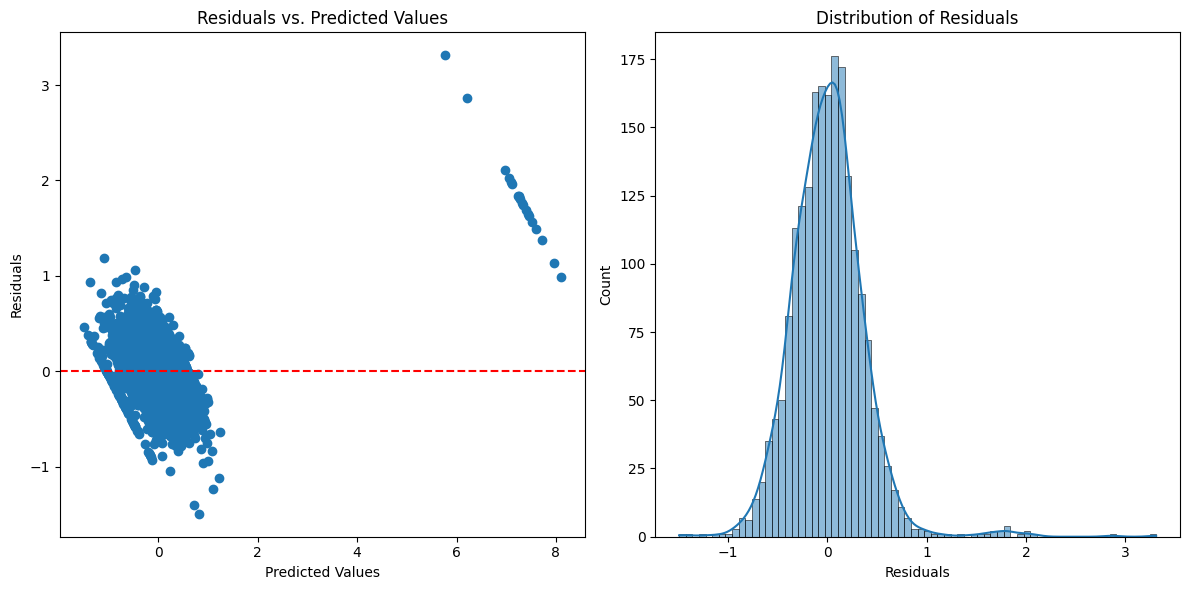

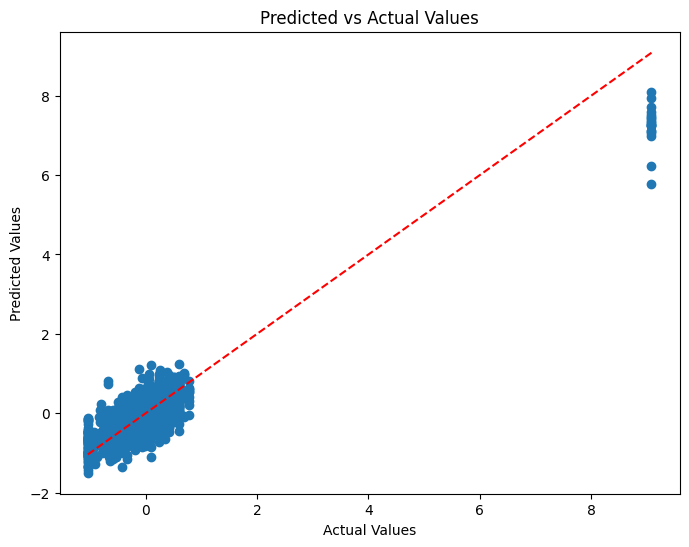

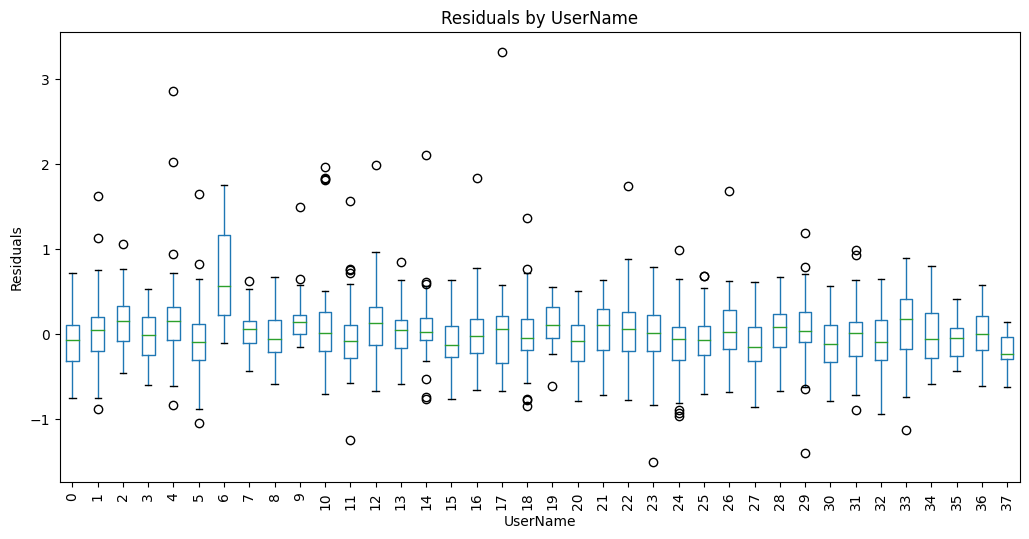

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer
import keras_tuner as kt


data = pd.read_csv('/content/playerdata.csv')


non_numeric_columns = data.select_dtypes(include=['object']).columns
for column in non_numeric_columns:
    data[column] = data[column].astype('category').cat.codes

imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Standardize the features
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_imputed)


data_clean = pd.DataFrame(data_standardized, columns=data.columns)

# Apply PCA
pca = PCA()
pca.fit(data_clean.drop('Load', axis=1))  # Exclude 'Load' during PCA

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_


cumulative_explained_variance = np.cumsum(explained_variance_ratio)
num_components_95_var = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Number of components that explain 95% of the variance: {num_components_95_var}')


pca = PCA(n_components=num_components_95_var)
principal_components = pca.fit_transform(data_clean.drop('Load', axis=1))


one_hot_encoder = OneHotEncoder(sparse=False)
usernames_encoded = one_hot_encoder.fit_transform(data[['UserName']])
pca_data = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(num_components_95_var)])
pca_data = pd.concat([pca_data, pd.DataFrame(usernames_encoded, columns=one_hot_encoder.get_feature_names_out(['UserName']))], axis=1)
pca_data['Load'] = data_clean['Load']

# Prepare data for RNN
X = pca_data.drop(['Load'], axis=1).values
y = pca_data['Load'].values

# Define the RNN model with hyperparameter tuning
def build_tuned_rnn_model(hp):
    model = Sequential()
    model.add(SimpleRNN(
        units=hp.Int('units', min_value=32, max_value=128, step=32),
        input_shape=(X.shape[1], 1),
        return_sequences=False
    ))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='linear'))

    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

tuner = kt.RandomSearch(
    build_tuned_rnn_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='rnn_tuning',
    project_name='load_prediction'
)

# Prepare for 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []
r2_scores = []
mae_scores = []
mape_scores = []

all_residuals = []
all_actuals = []
all_predictions = []

# Perform 5-fold cross-validation with hyperparameter tuning
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Reshape data for RNN
    X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Hyperparameter tuning
    tuner.search(X_train_reshaped, y_train, epochs=50, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3)], verbose=0)
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    best_model = tuner.hypermodel.build(best_hps)

    # Train the best model
    best_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

    # Predict using the test set
    y_pred = best_model.predict(X_test_reshaped).flatten()

    # Store residuals for analysis
    residuals = y_test - y_pred
    all_residuals.extend(residuals)
    all_actuals.extend(y_test)
    all_predictions.extend(y_pred)

    # Calculate error metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs(residuals / y_test)) * 100

    rmse_scores.append(rmse)
    r2_scores.append(r2)
    mae_scores.append(mae)
    mape_scores.append(mape)

# Print average error metrics across folds
average_rmse = np.mean(rmse_scores)
average_r2 = np.mean(r2_scores)
average_mae = np.mean(mae_scores)
average_mape = np.mean(mape_scores)

print(f'Average RMSE: {average_rmse}')
print(f'Average R^2: {average_r2}')
print(f'Average MAE: {average_mae}')
print(f'Average MAPE: {average_mape}%')

# Residual analysis plots
plt.figure(figsize=(12, 6))

# Residuals plot
plt.subplot(1, 2, 1)
plt.scatter(all_predictions, all_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(all_residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

# Predicted vs Actual plot
plt.figure(figsize=(8, 6))
plt.scatter(all_actuals, all_predictions)
plt.plot([min(all_actuals), max(all_actuals)], [min(all_actuals), max(all_actuals)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

# Error analysis by group (UserName)
grouped_residuals = pd.DataFrame({'UserName': data['UserName'], 'Residual': all_residuals})
grouped_residuals.boxplot(by='UserName', column='Residual', grid=False, rot=90, figsize=(12, 6))
plt.title('Residuals by UserName')
plt.suptitle('')
plt.xlabel('UserName')
plt.ylabel('Residuals')
plt.show()


**Model Evaluation Metrics**

The performance of the Reccurent Neural Network(RNN) model on the test set is quantified as follows:

**R2 (Coefficient of Determination):**

0.85, indicating that approximately 85% of the variance in Load is explained by our model. This is still a good value, suggesting good model performance.

**RMSE (Root Mean Squared Error):**

0.36, which measures the average magnitude of the errors in predicting Load. The lower the RMSE, the better the model's accuracy.

These metrics suggest that the model effectively captures the relationship between the features and the target variable and is able to predict with good accuracy.